In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [16]:
import numpy as np

df = pd.read_csv('./titanic.csv')
dict1 = {'S': 1, 'C': 2, 'Q': 3, np.nan:0}
df['Embarked'] = df['Embarked'].map(dict1)
df['Sex'] = np.where(df['Sex']=='male', 1, 2)
print(df.columns[df.isna().any()].tolist())
df = df.dropna()
x = df[['Pclass','Sex','Age','Parch','SibSp', 'Fare','Embarked']]
y = df['Survived']

x.head()

['Age', 'Cabin']


,Pclass,Sex,Age,Parch,SibSp,Fare,Embarked
1,1,2,38.0,0,1,71.2833,2
3,1,2,35.0,0,1,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,2,4.0,1,1,16.7000,1
11,1,2,58.0,0,0,26.5500,1


In [11]:
x.columns[x.isna().any()].tolist()

['Age']

In [12]:
x = x.dropna()

In [13]:
x.columns[x.isna().any()].tolist()

[]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [21]:
from sklearn.model_selection import RandomizedSearchCV

clf = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,40), 'criterion': ['gini', 'entropy', 'log_loss'], 'min_samples_leaf': range(1, 30)}

search = RandomizedSearchCV(clf, parameters, scoring='f1_micro')
search.fit(x,y)
best_tree = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

0.7837837837837838
{'min_samples_split': 18, 'min_samples_leaf': 1, 'max_depth': 9, 'criterion': 'gini'}


[Text(0.47058823529411764, 0.9444444444444444, 'Sex <= 1.5\ngini = 0.438\nsamples = 185\nvalue = [60, 125]\nclass = survived'),
 Text(0.23529411764705882, 0.8333333333333334, 'Age <= 17.5\ngini = 0.491\nsamples = 95\nvalue = [54, 41]\nclass = dead'),
 Text(0.17647058823529413, 0.7222222222222222, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = survived'),
 Text(0.29411764705882354, 0.7222222222222222, 'Age <= 43.0\ngini = 0.471\nsamples = 87\nvalue = [54, 33]\nclass = dead'),
 Text(0.11764705882352941, 0.6111111111111112, 'Fare <= 7.85\ngini = 0.499\nsamples = 48\nvalue = [25, 23]\nclass = dead'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = dead'),
 Text(0.17647058823529413, 0.5, 'Age <= 24.5\ngini = 0.495\nsamples = 42\nvalue = [19.0, 23.0]\nclass = survived'),
 Text(0.11764705882352941, 0.3888888888888889, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = dead'),
 Text(0.23529411764705882, 0.3888888888888889, 'Age <= 28.5\ngini = 0.467\nsamp

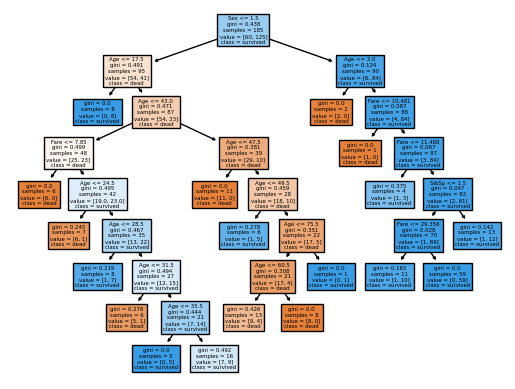

In [24]:
fn = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']
cn = ['dead', 'survived']
tree.plot_tree(best_tree, filled=True, class_names=cn, feature_names=fn)

In [ ]:
depth = 1
f1 = 0
max_depth_range = range(1,10)
rs = np.random.seed(0)

for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=32, class_weight='balanced', max_depth=max_depth, random_state=rs)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    # score_data =  max_depth train_score test_score

score_data